# Lab 1: Perceptrón con Fuerza Bruta y Montecarlo

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab1/blob/main/lab1.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [3]:
import os

REPO_NAME = "lab1"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)


## Análisis Exploratorio.

Importar librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Cargar y visualizar los datos.

In [5]:
data = pd.read_csv('dataset-lab1.csv')
print(data.head())

         X1        X2    Y
0  0.142131  0.845482  0.0
1  0.869759  0.708864  1.0
2  0.238923  0.919601  0.0
3  0.268460  0.431270  0.0
4  0.922154  0.470211  1.0


Plot de los datos.

X1 shape: (100,)
X2 shape: (100,)
Y shape: (100,)


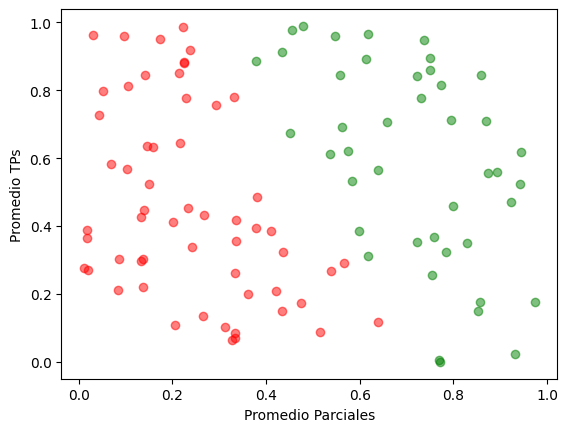

In [6]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos la función candidata.

In [7]:
def perceptron(x1, x2, params):
    linear_combination = x1 * params['w1'] + x2 * params['w2'] + params['b']
    return (linear_combination >= 0) * 1

Definimos una función costo, por ejemplo, el error absoluto medio.

In [8]:
def loss(y_predicted, y_real):
    return np.mean(np.absolute(y_predicted - y_real))

De ahora en adelante, el objetivo es encontrar los parámetros que minimicen la función costo.

Ejemplo con valores iniciales arbitrarios:

In [9]:
params = {
    'w1': 1,
    'w2': -1,
    'b': 0
}

y_predicted = perceptron(X1, X2, params)

print('Loss:', loss(y_predicted, Y))

Loss: 0.36


Definimos una función para plotear la frontera de decisión sobre los datos.

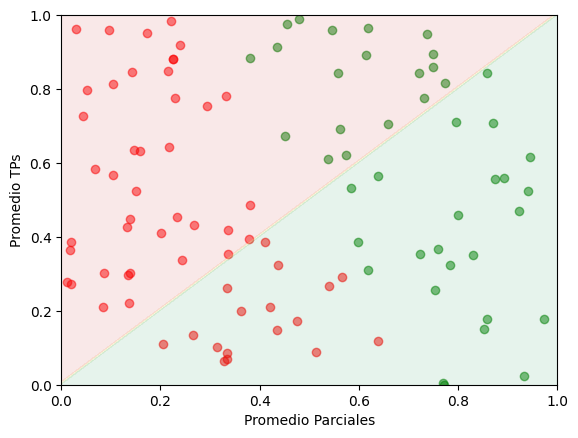

In [10]:
def plot_results(X1, X2, Y, params):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    x1, x2 = np.meshgrid(x1, x2)
    y = perceptron(x1, x2, params)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.1, cmap='RdYlGn')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, params)

## Búsqueda por fuerza bruta.
La idea es recorrer todos los valores posibles de los parámetros y quedarnos con aquellos que minimicen la función costo.

Completar el siguiente bloque con la implementación de la búsqueda por fuerza bruta:

Best loss: 1
Best params: {'w1': 0, 'w2': 0, 'b': 0}


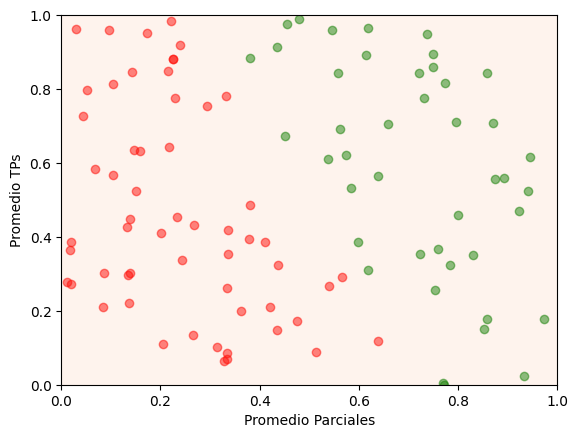

In [11]:
STEP = 0.1
MIN = -1
MAX = 1
W1 = np.arange(MIN, MAX, STEP)
W2 = np.arange(MIN, MAX, STEP)
B = np.arange(MIN, MAX, STEP)

best_params = {
    'w1': 0,
    'w2': 0,
    'b': 0
}

best_loss = 1

# Completar el código para encontrar los mejores parámetros.
# Iterar sobre todos los valores posibles de w1, w2 y b en un loop anidado.
# En cada iteración, deberíamos hacer algo como:
# 1. Construir un diccionario con los parámetros a probar:
# params = {
#     'w1': w1,
#     'w2': w2,
#     'b': b
# }
# 2. Calcular la predicción (y_predicted) con estos parámetros.
# y_predicted = perceptron(X1, X2, params)
# 3. Calcular el loss con estos parámetros.
# l = loss(y_predicted, Y)
# 4. Si el loss es mejor que el best_loss, actualizar best_loss y best_params.

print('Best loss:', best_loss)
print('Best params:', best_params)

plot_results(X1, X2, Y, best_params)

## Método Monte Carlo.
La idea es generar valores aleatorios para los parámetros y quedarse con el que minimiza la función costo.
Completar el siguiente bloque con la implementación del método Monte Carlo:

Best loss: 1
Best params: {'w1': 0, 'w2': 0, 'b': 0}


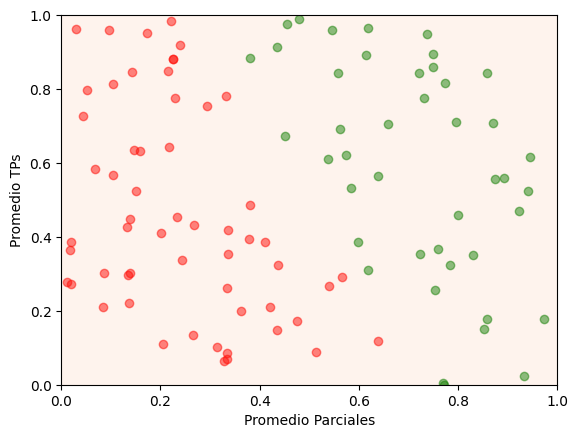

In [12]:
best_loss = 1
best_params = {
    'w1': 0,
    'w2': 0,
    'b': 0
}

ITERATIONS = 10000

# Completar el código para encontrar los mejores parámetros.
# Realizar un loop de ITERATIONS iteraciones.
# En cada iteración, deberíamos hacer algo como:
# 1. Construir un diccionario con los parámetros a probar. Usar np.random.uniform para generar valores aleatorios.
# 2. Calcular la predicción (y_predicted) con estos parámetros.
# y_predicted = perceptron(X1, X2, params)
# 3. Calcular el loss con estos parámetros.
# l = loss(y_predicted, Y)
# 4. Si el loss es mejor que el best_loss, actualizar best_loss y best_params.

print('Best loss:', best_loss)
print('Best params:', best_params)

plot_results(X1, X2, Y, best_params)
